In [1]:
import pandas as pd
import numpy as np

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

#: ID for each pokemon
Name: Name of each pokemon
Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
Type 2: Some pokemon are dual type and have 2
Total: sum of all stats that come after this, a general guide to how strong a pokemon is
HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
Attack: the base modifier for normal attacks (eg. Scratch, Punch)
Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round

objectives : zero missing value and create new collom describing leveling up new pokemon 

In [2]:
df=pd.read_csv('/Users/aliel/Downloads/Pokemon.csv')

data loading

In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


data query

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


explorasi data

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


explorasi data

In [6]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

missing value

In [7]:
df['Type 2'].fillna('np.nan', inplace=True)

manipulating colomns

In [8]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

manipulating colomns

In [11]:
df[['Name','Type 1','Type 2']][df['Total']>=450]

,Name,Type 1,Type 2
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
6,Charizard,Fire,Flying
7,CharizardMega Charizard X,Fire,Dragon
8,CharizardMega Charizard Y,Fire,Flying
...,...,...,...
795,Diancie,Rock,Fairy
796,DiancieMega Diancie,Rock,Fairy
797,HoopaHoopa Confined,Psychic,Ghost
798,HoopaHoopa Unbound,Psychic,Dark


In [15]:
df['Total']<=450

0       True
1       True
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Total, Length: 800, dtype: bool

Grouping and Aggregating

In [ ]:
def x_sq(x):
    return x**2

df['Leveling_up']=df['Total'].apply(lambda Total: x_sq(Total))
df['Leveling_up']

0      101124
1      164025
2      275625
3      390625
4       95481
        ...  
795    360000
796    490000
797    360000
798    462400
799    360000
Name: Leveling_up, Length: 800, dtype: int64

manipulating colomns

In [ ]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Leveling_up
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,101124
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,164025
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,275625
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,390625
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,95481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,360000
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,490000
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,360000
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,462400


<AxesSubplot:ylabel='Frequency'>

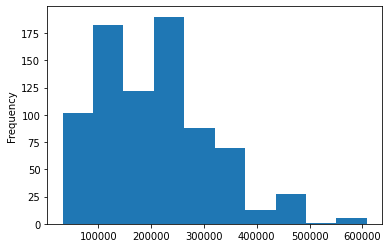

In [ ]:
df['Leveling_up'].plot(kind='hist')

Pandas Visualization

In [ ]:
df.Leveling_up.std()

107994.28309371938

Conclusion : the standard deviation in pokemon leveling_up is very wide